<a href="https://colab.research.google.com/github/shivsablok27/rnn-lstm-review-sentiment-analysis/blob/main/rnn_sentiment_analysis_basic_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎬 Sentiment Analysis of Movie Reviews using Recurrent Neural Networks (RNN)

## 🔍 Project Overview

In this project, we will build a **Sentiment Analysis model** using **Recurrent Neural Networks (RNNs)** to classify movie reviews as either **positive** or **negative**. The dataset we will use is the **IMDB Movie Reviews Dataset**, which is provided by Keras and contains 50,000 labeled movie reviews.

Each review is preprocessed and represented as a sequence of word indices (integers), with labels:
- **1** = Positive review
- **0** = Negative review

---

## 📦 What is Sentiment Analysis?

**Sentiment Analysis** is a popular **Natural Language Processing (NLP)** task where the goal is to determine the **emotional tone** behind a body of text. It helps us understand whether the opinion expressed in a piece of text is **positive, negative, or neutral**.

---

## 🧠 Why Recurrent Neural Network (RNN)?

RNNs are specially designed to handle **sequential data**, like text. In a sentence or review:
- The **meaning of a word** can depend on the **previous words**.
- RNNs have a **memory** of previous steps, which helps in understanding **context**.

Hence, they are a natural choice for **text classification tasks** such as sentiment analysis.

---

## 🧰 Tools & Libraries

We will use the following:
- **TensorFlow / Keras** for building and training the RNN model
- **Matplotlib** for visualizing performance
- **Keras's IMDB dataset** for data

---

## ✅ What We'll Do Step-by-Step:

1. **Load and explore** the IMDB dataset  
2. **Decode and visualize** raw reviews  
3. **Preprocess** text sequences (padding, truncating)  
4. **Build the RNN model** using Embedding + SimpleRNN  
5. **Train** and **evaluate** the model  
6. **Visualize** training progress  
7. **Predict** new reviews and test model performance

---

## 🏁 Goal

By the end of this project, we will have a working RNN model that can classify unseen movie reviews as **positive** or **negative** based on the text content.

Let’s get started! 🚀


---
---

## 📥 Step 1: Loading the IMDB Sentiment Dataset

We are using the **IMDB Movie Review Dataset** built into Keras. It contains:
- **50,000** reviews in total
  - 25,000 for training
  - 25,000 for testing
- Each review is already preprocessed and represented as a **sequence of integers**, where each integer corresponds to a word (based on word frequency ranking).
- Labels:
  - `1` → Positive sentiment
  - `0` → Negative sentiment

To simplify our model training, we will only keep the **top 10,000 most frequent words** from the dataset.
"Sirf top 10,000 most frequent words" hi include karo dataset mein.
Baaki jitne bhi rare words hain (low frequency wale), unko <UNK> token se replace kar diya jaayega (index 2).

Let’s now load the dataset and take a look at its structure.


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

# For reproducibility
np.random.seed(42)

# Define vocabulary size: only keep top 10,000 words
vocab_size = 10000

# Load the dataset from Keras
# It returns: (x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Print basic information
print(f"Number of training samples: {len(x_train)}")
print(f"Number of testing samples: {len(x_test)}")

# Preview the first encoded review
print("\nEncoded review (x_train[0]):")
print(x_train[0])

# Preview the corresponding sentiment label
print("\nSentiment label (y_train[0]):", y_train[0])


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Number of training samples: 25000
Number of testing samples: 25000

Encoded review (x_train[0]):
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 6

## 🔤 Step 2: Decoding the Encoded Reviews into Readable Text

The reviews in the IMDB dataset are encoded as sequences of integers, where:
- Each integer represents a **specific word**.
- These words are ranked by **frequency** (most common words get smaller indices).

To interpret the reviews, we need to:
1. **Load the word index** dictionary from Keras, which maps words to their integer index.
2. **Reverse** this mapping to get index → word.
3. **Decode** a review (list of integers) back into actual English words.

Let’s decode the first review from the training data and see what it looks like in plain text!


In [3]:
# Load the word index dictionary: word → integer
word_index = imdb.get_word_index()

# Shift the word indices by 3 because:
# 0 = padding, 1 = start of sequence, 2 = unknown
word_index = {word: (index + 3) for word, index in word_index.items()}

# Add special tokens manually
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

# Create reverse mapping: integer → word
reverse_word_index = {index: word for word, index in word_index.items()}

# Function to decode a review
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i, "?") for i in encoded_review])

# Decode and print the first training review
decoded = decode_review(x_train[0])
print("📝 Decoded Review:\n")
print(decoded)

# Also print the sentiment label
print("\n✅ Sentiment Label:", "Positive" if y_train[0] == 1 else "Negative")


📝 Decoded Review:

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should

## 🧱 Step 3: Padding the Sequences

To feed the reviews into a neural network, all input sequences must have the **same length**.

Since the IMDB reviews vary in length, we will:
- **Pad** shorter reviews with zeros (`<PAD>`) at the end.
- **Truncate** longer reviews to a fixed size.

We'll use Keras's `pad_sequences` function to do this.

We’ll choose a maximum review length (e.g., 100 words) to standardize all reviews to length 100.


In [4]:
from collections.abc import Sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

print("Shape of training data after padding:", x_train.shape)
print("Shape of test data after padding:", x_test.shape)

# Set maximum review length
maxlen = 100  # You can experiment with this later

# Pad training and testing sequences
x_train_padded = pad_sequences(x_train, maxlen=maxlen, padding='post', truncating='post')
x_test_padded = pad_sequences(x_test, maxlen=maxlen, padding='post', truncating='post')

# Show shape after padding
print("Shape of training data after padding:", x_train_padded.shape)
print("Shape of test data after padding:", x_test_padded.shape)


print("\nFor an instance, length of 0th review",len(x_train[0]))
print("Length < 100, so Padding will be done" if len(x_train[0])<100 else "Length > 100, so Truncation will be done")

print("\nOriginal review :")
print(np.array(x_train[0]))

# Show a sample padded review
print("\nPadded review :")
print(x_train_padded[0])



Shape of training data after padding: (25000,)
Shape of test data after padding: (25000,)
Shape of training data after padding: (25000, 100)
Shape of test data after padding: (25000, 100)

For an instance, length of 0th review 218
Length > 100, so Truncation will be done

Original review :
[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256

## 🧠 Step 4: Building the LSTM-Based Sentiment Classifier

In this step, we are building a more powerful Recurrent Neural Network (RNN) using **LSTM (Long Short-Term Memory)** units via Keras' **Sequential API**, to classify IMDB movie reviews as either positive or negative.

---

🔧 **Why LSTM Instead of Simple RNN?**
- While a SimpleRNN layer can process sequential data, it **struggles with long-term dependencies** and is prone to **overfitting** and the **vanishing gradient problem**.
- To overcome this, we use **LSTM**, which is specially designed to handle long sequences and retain important information over time.

---

### 🔍 Architecture Overview:

- **Input Layer:** Accepts a fixed-length sequence of word indices (e.g., 100 words per review).
  
- **Embedding Layer:** Transforms each word index into a dense 2-dimensional vector. These word embeddings help the model understand the semantic meaning and relationships between words.

- **SpatialDropout1D:** Randomly drops entire word vectors during training (not just individual values), which helps prevent overfitting in text data.

- **LSTM Layer:**
  - Contains 32 hidden units (memory cells).
  - Includes **input dropout (0.2)** and **recurrent dropout (0.2)** to regularize both input and memory connections.
  - This layer reads the word sequence and captures contextual dependencies over time (e.g., understanding "not good" ≠ "good").

- **Dense Output Layer:** A single neuron with a **sigmoid** activation function that outputs a probability between 0 and 1.
  - **0** = negative sentiment  
  - **1** = positive sentiment

---

### 🔧 Compilation Configuration:
- **Loss Function:** `binary_crossentropy` — perfect for binary classification tasks.
- **Optimizer:** `adam` — fast and effective adaptive optimizer.
- **Metrics:** `accuracy` — to track how well the model performs during training and validation.

---

✨ With this improved architecture, the model is now more capable of handling real-world text patterns and generalizing better across unseen reviews.

---

### 🏋️‍♂️ Model Training

We now train our model using the padded training data. To prevent overfitting and save time, we use **EarlyStopping**, a callback that stops training if the model's performance on the validation set doesn't improve after a few epochs.

---

### 🔁 Training Configuration:

- **`epochs=10`**: We allow the model to train for up to 10 full passes over the training data.
- **`batch_size=128`**: The model updates its weights after processing 128 samples at a time.
- **`validation_split=0.2`**: 20% of the training data is used for validation, to monitor how well the model generalizes.
- **`verbose=1`**: Training progress is shown in the output.
- **`callbacks=[early_stop]`**: We use the `EarlyStopping` callback to monitor validation loss (`val_loss`):
  - If it doesn't improve for **3 consecutive epochs** (`patience=3`), training stops early.
  - The model **restores the best weights** observed during training (`restore_best_weights=True`), ensuring we don't keep the overfitted version.

---

This training setup helps balance **model performance** with **training time**, while reducing the risk of **overfitting** to the training data.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense, Dropout, LSTM, SpatialDropout1D

model = Sequential()
model.add(Input(shape=(maxlen,)))                  # Each review = 100 words
model.add(Embedding(vocab_size, 2))           # Each word → 2-dim vector
model.add(SpatialDropout1D(0.3))
model.add(LSTM(32, dropout=0.2, recurrent_dropout =0.2))                       # RNN on sequence
model.add(Dense(1, activation='sigmoid'))       # Binary classification
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 100, 2)         │        20,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_5             │ (None, 100, 2)         │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │         4,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,513 (95.75 KB)

 Trainable params: 24,513 (95.75 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from tensorflow.keras.optimizers import Adam

# Use a smaller learning rate
optimizer = Adam(learning_rate=0.0005)

model.compile(
    loss='binary_crossentropy',       # Still suitable for binary classification
    optimizer=optimizer,              # Slower updates (less chance of overfitting)
    metrics=['accuracy']
)


In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_loss", patience = 3, restore_best_weights = True)

#Train the model
history = model.fit(
    x_train_padded, y_train,        # Training data
    epochs=10,                       # Total passes through data
    batch_size=128,                 # Number of samples per gradient update
    validation_split=0.2,          # 10% training data used for validation
    verbose=1,                      # Show training progress
    callbacks = [early_stop]
)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 328ms/step - accuracy: 0.7441 - loss: 0.5481 - val_accuracy: 0.7980 - val_loss: 0.4973
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 326ms/step - accuracy: 0.7527 - loss: 0.5252 - val_accuracy: 0.7882 - val_loss: 0.5163
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 330ms/step - accuracy: 0.7625 - loss: 0.4994 - val_accuracy: 0.8054 - val_loss: 0.4376
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 326ms/step - accuracy: 0.7738 - loss: 0.4698 - val_accuracy: 0.7928 - val_loss: 0.4756
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 54s 347ms/step - accuracy: 0.7734 - loss: 0.4626 - val_accuracy: 0.8108 - val_loss: 0.4342
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 79s 329ms/step - accuracy: 0.7923 - loss: 0.4343 - val_accuracy: 0.8120 - val_loss: 0.4218
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 328ms/step - accuracy: 0.7977 - loss: 0.4222 - val_accuracy: 0.8212 - val_loss: 0.4138
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 326ms/step - accuracy: 0.8010 - loss: 0

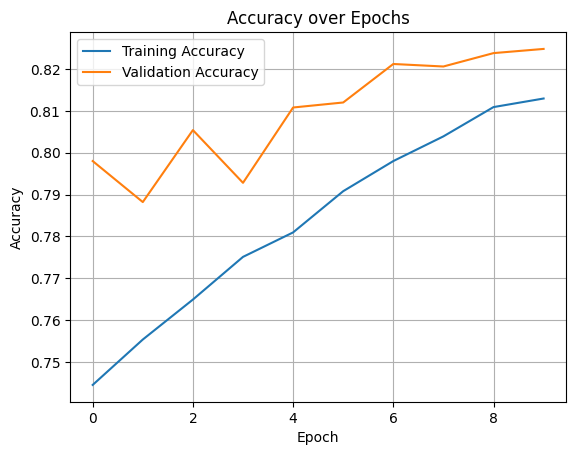

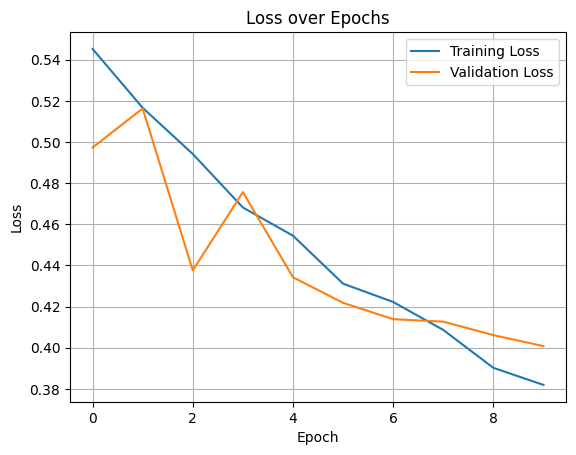

In [21]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


---

### 🧪 Step 5: Model Testing & Evaluation

Once our model is trained and early stopping has ensured the best weights are preserved, we now evaluate the model on **unseen test data** to check its real-world performance.

---



In [22]:
# ✨ Step 6: Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test_padded, y_test, verbose=1)

print(f"\n📊 Test Accuracy: {test_acc:.4f}")
print(f"📉 Test Loss: {test_loss:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.7953 - loss: 0.4407

📊 Test Accuracy: 0.7955
📉 Test Loss: 0.4421


### 🧠 Step 6: Real-Time Sentiment Prediction Function

This function allows us to test **any custom review** (e.g., typed by the user) and get the sentiment prediction instantly.

🔹 It performs all necessary preprocessing steps internally:
- Converts the review into lowercase and splits it into words.
- Looks up each word in the IMDB word index.
- Handles any unknown words using a special `<UNK>` token.
- Adds the `<START>` token at the beginning, just like the original IMDB dataset format.
- Pads the review to the same fixed length (`maxlen = 100`) used during training.

🔹 After preprocessing:
- The padded input is passed directly into our trained model.
- The model returns a **probability score** between 0 and 1.
- The function prints both the score and the final **sentiment decision**:
  - If score ≥ 0.5 → **Positive 😊**
  - If score < 0.5 → **Negative 😞**

✅ This means we don’t need to do any extra work like fitting a tokenizer or separately padding the input. Everything is handled inside the function. We simply pass a string and get the result.

📌 Designed to be used directly after training and evaluating the model.



In [42]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Get the IMDB word index only once
word_index = imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

# 👇 Define one single function to handle everything
def predict_sentiment(review, model, maxlen=100):
    # Encode review
    tokens = review.lower().split()
    encoded = [1]  # <START> token
    for word in tokens:
        if word in word_index:
            encoded.append(word_index[word])
        else:
            encoded.append(2)  # <UNK>

    # Pad the sequence
    padded = pad_sequences([encoded], maxlen=maxlen)

    # Predict
    pred_prob = model.predict(padded, verbose=0)[0][0]

    # Print result
    if pred_prob >= 0.6:
      print(f"✅ Sentiment: Positive 😊 with a confidence of {pred_prob * 100:.2f}%")
    else:
      print(f"✅ Sentiment: Negative 😞 with a confidence of {(1 - pred_prob) * 100:.2f}%")



In [43]:
predict_sentiment("The plot was dull and boring, I slept halfway.", model)


✅ Sentiment: Negative 😞 with a confidence of 70.04%


In [44]:
predict_sentiment("This is a very thrilling movie.I recomment everyone to watch it", model)

✅ Sentiment: Positive 😊 with a confidence of 79.66%


In [45]:
predict_sentiment("Worst movie ever!",model)

✅ Sentiment: Negative 😞 with a confidence of 43.71%


In [46]:
predict_sentiment("Awesome movie!!", model)

✅ Sentiment: Positive 😊 with a confidence of 81.33%


# Saving the Model

In [47]:
model.save("rnn-lstm-sentiment_model.h5")
